# Before we start the t-test we should do some exploratory data analysis to create some hypothesis. 

In [1]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Let us load in our min/max adjusted data

In [3]:
data = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_EM.csv') 
#data = pd.read_excel (r'preprocess_securites.xlsx', sheet_name='HY')

In [4]:
#data.head()
data.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.032073,0.584587,0.517158,0.511626,0.396204,0.523567,0.400107,0.497321,0.463135,0.456587,0.526603,0.411268,0.507779,0.321350,0.437807,0.389493,0.394455,4
1,1997-02-28 00:00:00,0.022910,0.593261,0.509066,0.551748,0.466362,0.494901,0.455225,0.503095,0.605420,0.427400,0.512503,0.411863,0.501391,0.331717,0.463633,0.371790,0.400467,4
2,1997-03-31 00:00:00,0.013746,0.477740,0.317745,0.511322,0.405427,0.457001,0.448342,0.478600,0.528539,0.411794,0.528331,0.420693,0.524060,0.342466,0.418786,0.345951,0.383512,4
3,1997-04-30 00:00:00,0.022910,0.697805,0.685033,0.448404,0.513258,0.478501,0.542739,0.470552,0.588306,0.392140,0.521106,0.431853,0.513958,0.358566,0.445930,0.308511,0.380955,4
4,1997-05-31 00:00:00,0.032073,0.643998,0.607264,0.468161,0.451746,0.516262,0.714240,0.426636,0.569584,0.410815,0.517072,0.440628,0.540596,0.363678,0.441016,0.285278,0.339880,4


# Lets see if our variables are correlated
### With correlation matrix 
# -------------------------------------------------------------------------------

# We can explore a lot with this above, but lets focus on OAS

### We see that the further we go out the more correlated the excess return is with OAS.
#### *It would be interesting to see how the correlation would change for 24M and 36M

# You can also see interesting patterns with the 3M to the 6M,9M,12M

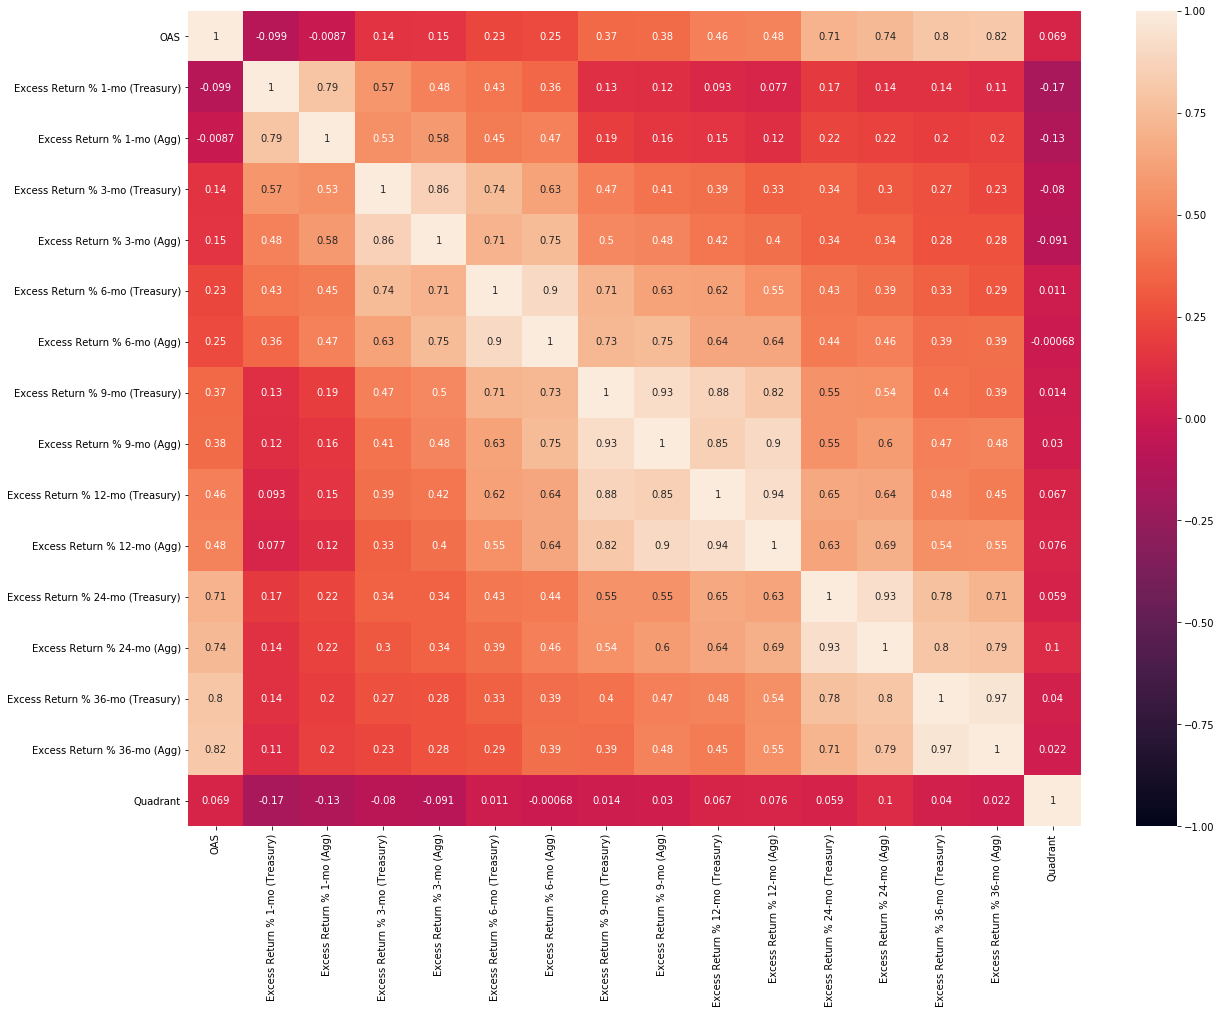

In [5]:
#Pairwise correlation between attributes
fig=plt.figure(figsize=(20, 15))
sns.heatmap(data[['OAS', 'Excess Return % 1-mo (Treasury)', 'Excess Return % 1-mo (Agg)', 'Excess Return % 3-mo (Treasury)', 'Excess Return % 3-mo (Agg)', 'Excess Return % 6-mo (Treasury)', 'Excess Return % 6-mo (Agg)','Excess Return % 9-mo (Treasury)', 'Excess Return % 9-mo (Agg)', 'Excess Return % 12-mo (Treasury)', 'Excess Return % 12-mo (Agg)', 'Excess Return % 24-mo (Treasury)','Excess Return % 24-mo (Agg)','Excess Return % 36-mo (Treasury)','Excess Return % 36-mo (Agg)','Quadrant']].corr(), vmin = -1, vmax=1, annot=True)
plt.show()

# Now that we see the picture, let us make some linear regression models.

## Relationship Between OAS & Excess Return % 1-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

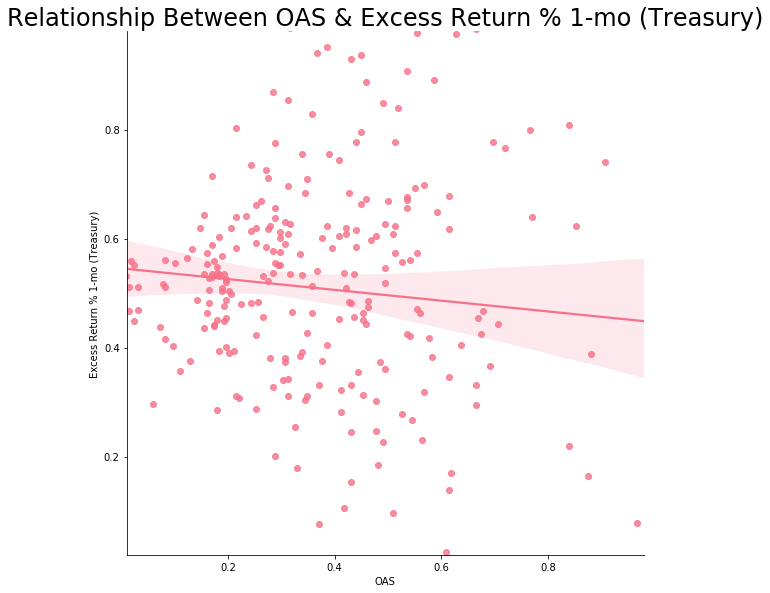

In [6]:
# For OAS Excess Return % 1-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 1-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 1-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

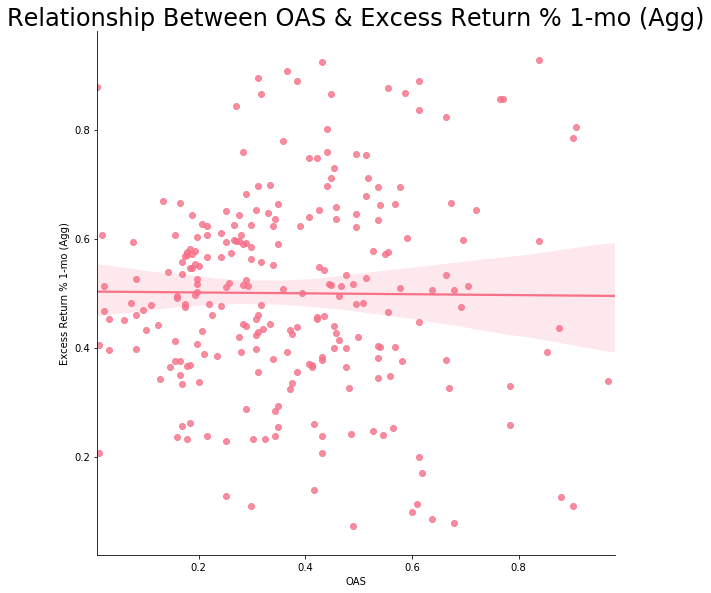

In [7]:
# For OAS Excess Return % 1-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 1-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 3-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

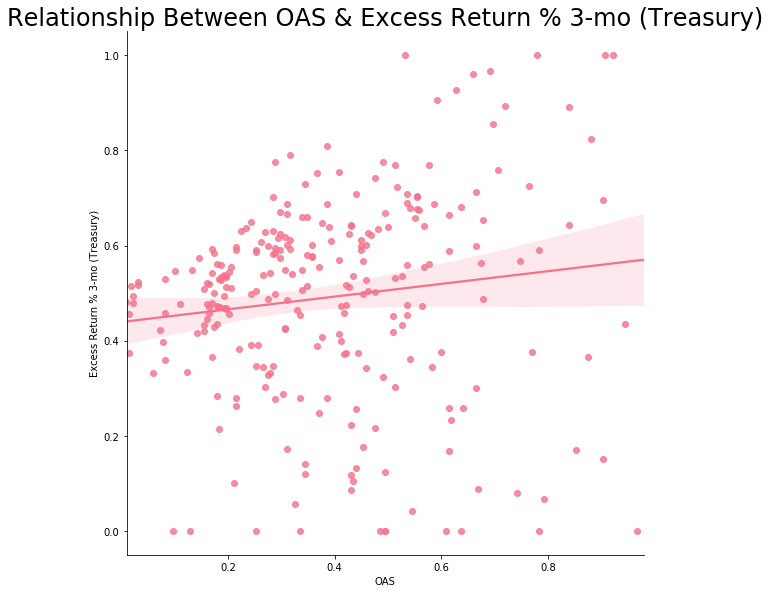

In [8]:
# For OAS Excess Return % 3-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 3-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Treasury)', size=24)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 3-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

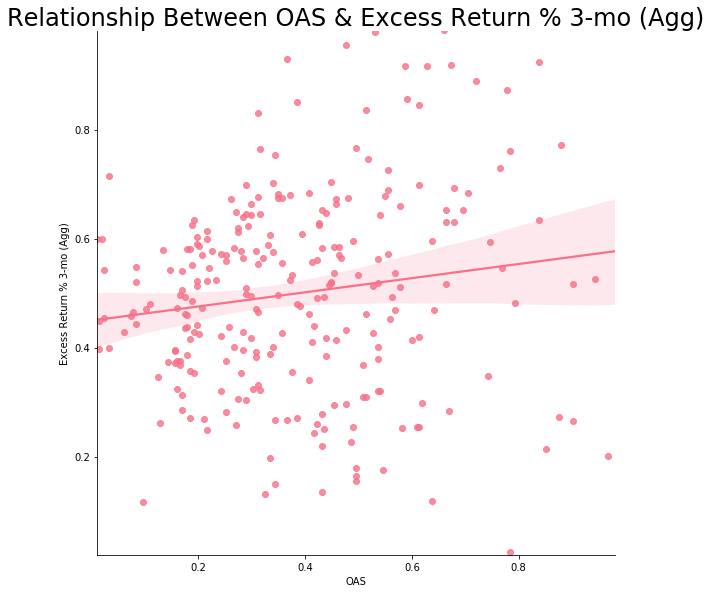

In [9]:
# For OAS Excess Return % 3-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 3-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 6-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

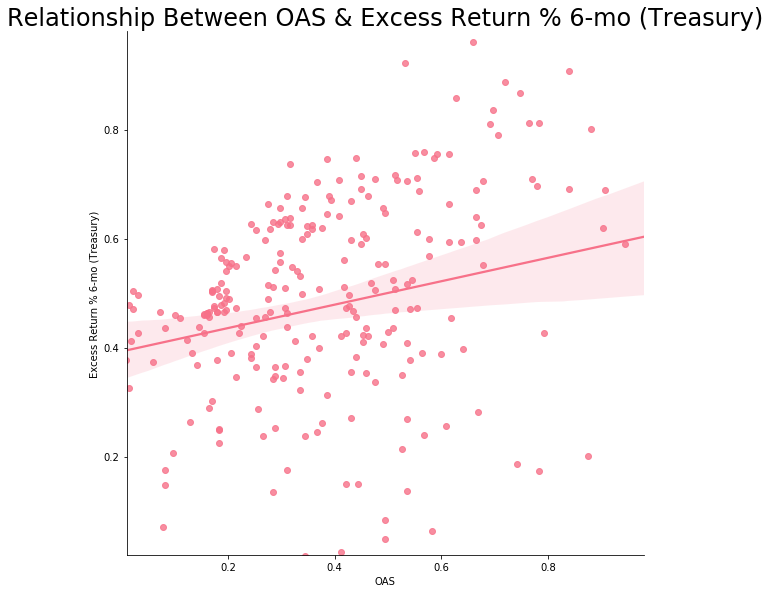

In [10]:
# For OAS Excess Return % 6-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 6-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 6-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

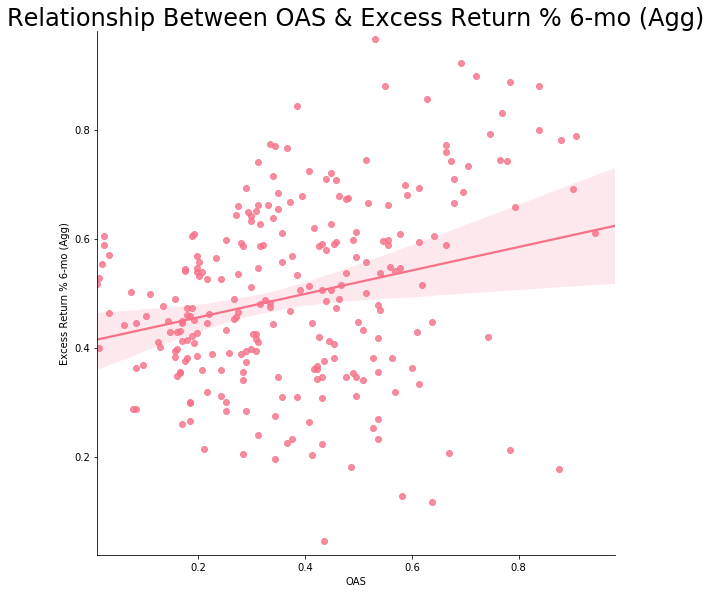

In [11]:
# For OAS Excess Return % 6-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 6-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 9-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

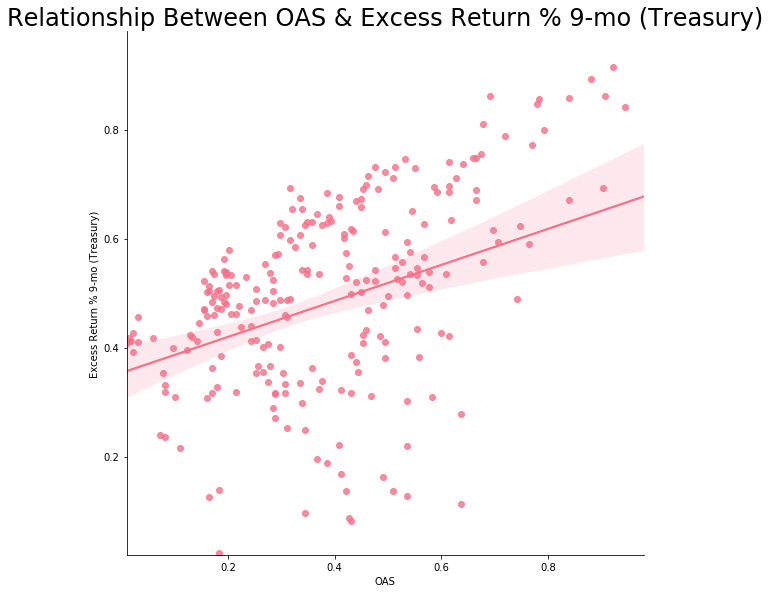

In [12]:
# For OAS Excess Return % 9-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 9-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 9-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

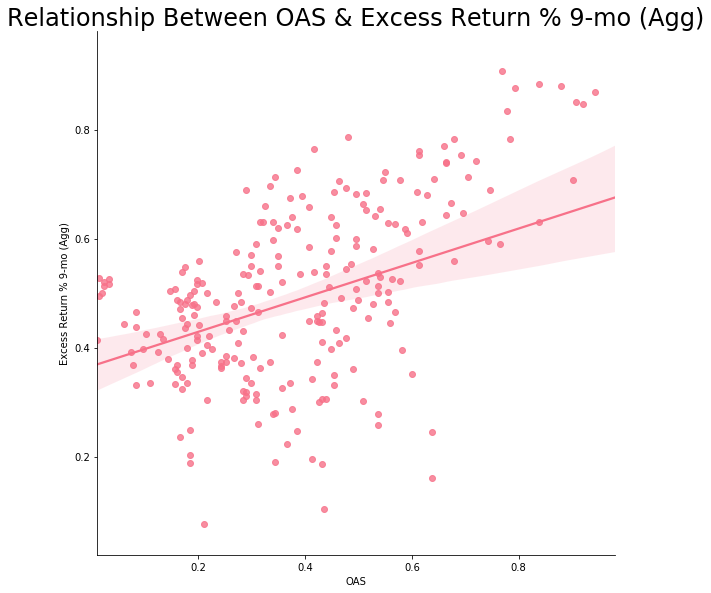

In [13]:
# For OAS Excess Return % 9-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 9-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 12-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

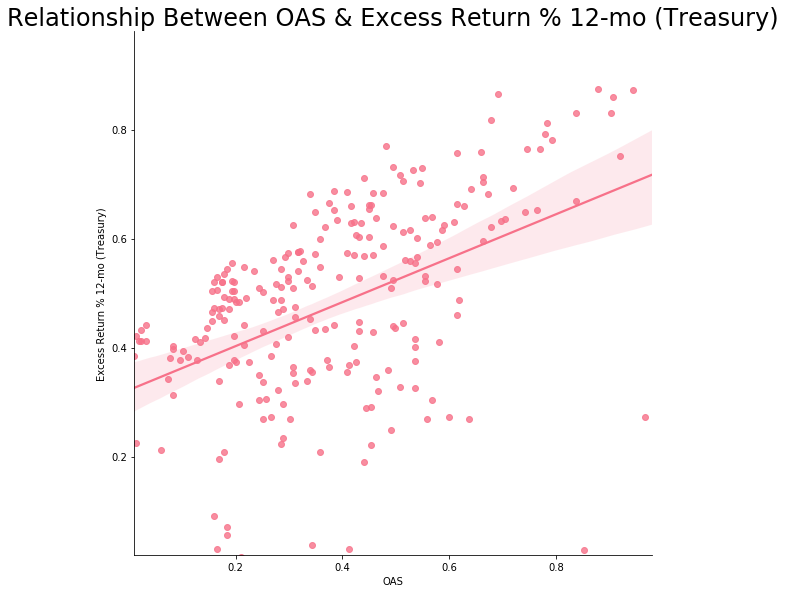

In [14]:
# For OAS Excess Return % 12-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 12-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 12-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

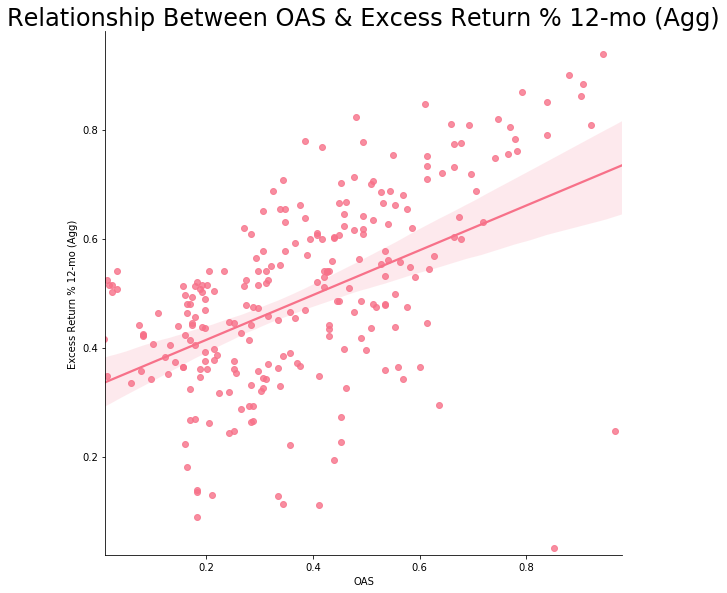

In [15]:
# For OAS Excess Return % 12-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 12-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 24-mo (Treasury) shown below.


(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

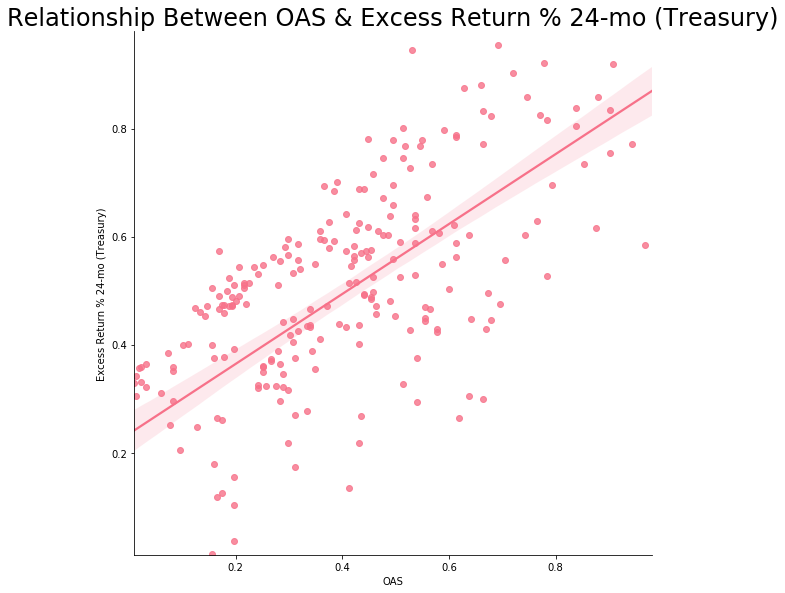

In [16]:
# For OAS Excess Return % 24-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 24-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 24-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.011)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 24-mo (Agg) shown below.


(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

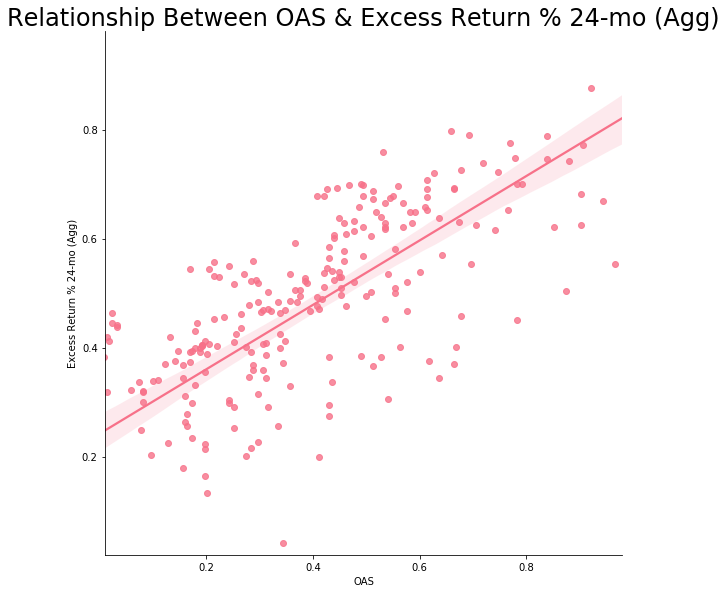

In [17]:
# For OAS Excess Return % 24-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 24-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 24-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 36-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

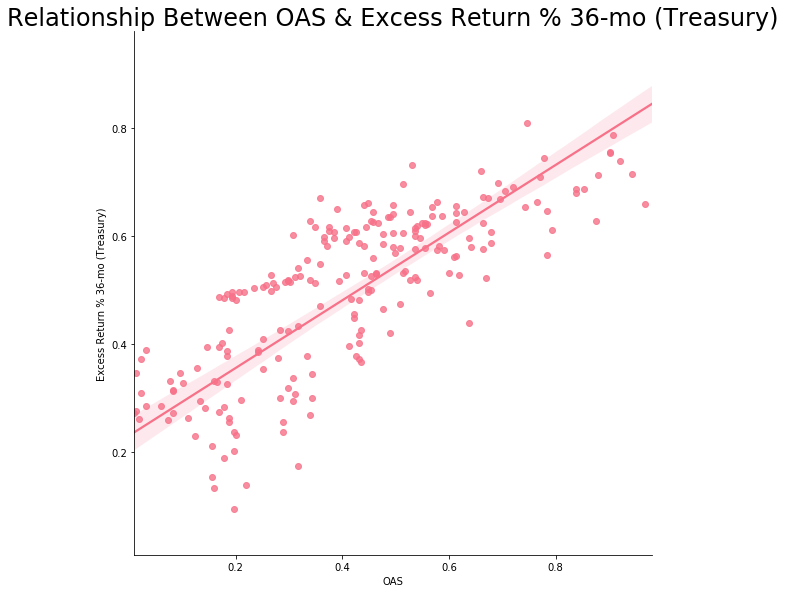

In [18]:
# For OAS Excess Return % 36-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 36-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 36-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.009)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 36-mo (Agg) shown below.


(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

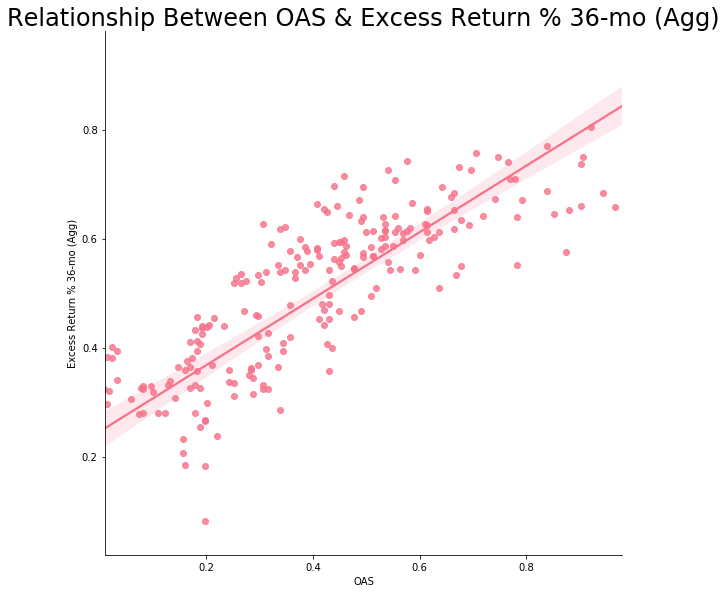

In [19]:
# For OAS Excess Return % 36-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 36-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 36-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)